<a href="https://colab.research.google.com/github/shailavij/Cognite_Repo/blob/main/plot_value_decrease_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install indsl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.1/633.1 KB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 577.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━


visualizing rolling standard deviation of time delta of time series data to identify dispersion in the ingestion of data.


In [4]:
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from indsl.data_quality.rolling_stddev import rolling_stddev_timedelta
from indsl.smooth import sma

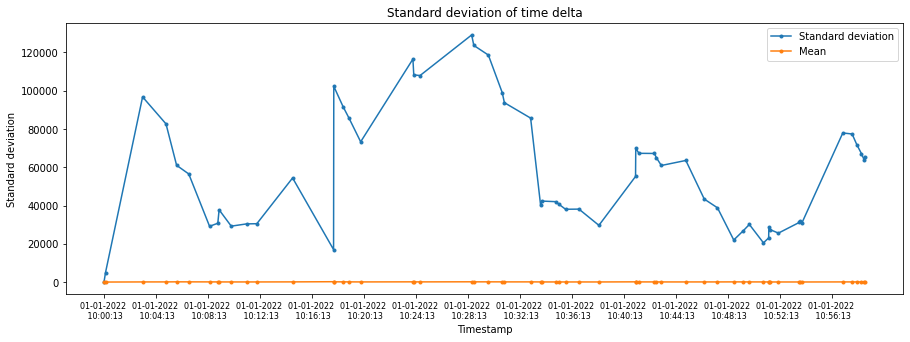

In [11]:
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from indsl.data_quality.rolling_stddev import rolling_stddev_timedelta
from indsl.smooth import sma


data = pd.Series(1, index=pd.date_range(start="2022-01-01 10:00:00", end="2022-01-01 11:00:00", freq="1s")).sample(60)

data = data.sort_index()


time_window = pd.Timedelta(minutes=5)

# Calculate rolling standard deviation of time delta
stddev = rolling_stddev_timedelta(data, time_window=time_window).values

# Calculate rolling mean of time delta
mean = sma(data.index.to_series().diff().astype("timedelta64[s]").fillna(0),time_window= time_window , min_periods=1)

# Plot standard deviation and mean
fig, ax = plt.subplots(figsize=(15, 5))
ax.title.set_text("Standard deviation of time delta")
ax.plot(data.index, stddev, label="Standard deviation", marker=".")
ax.plot(data.index, mean, label="Mean", marker=".")

values = np.arange(data.index[0], data.index[-1], timedelta(minutes=4)).astype(datetime)

ax.set_xticks(values)
ax.set_xticklabels([ts.strftime("%d-%m-%Y \n %H:%M:%S") for ts in values], fontsize=8)

legend = ax.legend(loc="upper right")

plt.xlabel("Timestamp")
plt.ylabel("Standard deviation")

plt.show()